# 기초적인 모델링 about 다중회귀분석

In [2]:
import torch

In [22]:
# 데이터 정의
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,60]
                             ])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

In [23]:
# 모델을 만든다 (wx+b)
from torch import nn

class MultivaraiteLinearRegressionModle(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)
        
    def forward(self,x):
        return self.linear(x)

model = MultivaraiteLinearRegressionModle()

In [24]:
# Optimizer & loss function
from torch import optim
optimizer = optim.SGD(model.parameters(), lr = 1e-5)

import torch.nn.functional as F

In [26]:
# training
n_epochs = 10
for epoch in range(1,n_epochs+1):
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)
    
    #backpropagation
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(epoch, n_epochs, prediction.squeeze().detach(), cost.item()))

Epoch    1/10 hypothesis: tensor([ -9.5201, -13.5915, -12.3251, -13.1184, -11.8105]) Cost: 33980.886719
Epoch    2/10 hypothesis: tensor([62.0023, 72.3571, 72.3708, 79.1010, 50.6314]) Cost: 10877.132812
Epoch    3/10 hypothesis: tensor([102.4343, 120.9452, 120.2502, 131.2333,  85.9324]) Cost: 3493.623047
Epoch    4/10 hypothesis: tensor([125.2906, 148.4128, 147.3169, 160.7039, 105.8902]) Cost: 1133.986572
Epoch    5/10 hypothesis: tensor([138.2111, 163.9407, 162.6179, 177.3634, 117.1743]) Cost: 379.880615
Epoch    6/10 hypothesis: tensor([145.5146, 172.7190, 171.2674, 186.7806, 123.5551]) Cost: 138.870178
Epoch    7/10 hypothesis: tensor([149.6429, 177.6816, 176.1569, 192.1037, 127.1640]) Cost: 61.834618
Epoch    8/10 hypothesis: tensor([151.9761, 180.4872, 178.9208, 195.1124, 129.2058]) Cost: 37.202221
Epoch    9/10 hypothesis: tensor([153.2946, 182.0733, 180.4829, 196.8125, 130.3617]) Cost: 29.316830
Epoch   10/10 hypothesis: tensor([154.0394, 182.9701, 181.3658, 197.7731, 131.0169])

# Dataset, Dataloader, batchsize 이용하기

In [27]:
#1) Dataset정의하기
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73,80,75],
                       [93,88,93],
                       [89,91,90],
                       [96,98,100],
                       [73,66,70]]
        self.y_data = [[152],[185],[180],[196],[142]]
    
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x,y
    
    
dataset = CustomDataset()


In [28]:
#2) batchsize를 활용하기 위한 Datalodaer만들기
from torch.utils.data import DataLoader

dataloader = DataLoader(
    dataset,
    batch_size = 2,
    shuffle= True
)


In [29]:
#3) 모델을 만든다 (wx+b)
from torch import nn

class MultivaraiteLinearRegressionModle(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1) # 3개는 feature개수 의미한다.
        
    def forward(self,x):
        return self.linear(x)

model = MultivaraiteLinearRegressionModle()

In [32]:
#4) Optimzer 정의하기
from torch import optim
optimizer = optim.SGD(model.parameters(), lr = 1e-5)

# loss function 정의하기
import torch.nn.functional as F

In [36]:
#5) 학습시키기
n_epcochs = 10

for epoch in range(1,n_epcochs+1):
    for batch_idx,samples in enumerate(dataloader):
        x_train, y_train = samples
        pred = model(x_train)
        cost = F.mse_loss(x_train, pred)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Batch: {}/{} Cost: {:.6f}'.format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))
    print("\n")
        
        
        
        
        

Epoch    1/10 Batch: 1/3 Cost: 5.606363
Epoch    1/10 Batch: 2/3 Cost: 12.109790
Epoch    1/10 Batch: 3/3 Cost: 3.275208


Epoch    2/10 Batch: 1/3 Cost: 4.741856
Epoch    2/10 Batch: 2/3 Cost: 12.499031
Epoch    2/10 Batch: 3/3 Cost: 2.949826


Epoch    3/10 Batch: 1/3 Cost: 5.183402
Epoch    3/10 Batch: 2/3 Cost: 13.080031
Epoch    3/10 Batch: 3/3 Cost: 1.650770


Epoch    4/10 Batch: 1/3 Cost: 5.187616
Epoch    4/10 Batch: 2/3 Cost: 6.287430
Epoch    4/10 Batch: 3/3 Cost: 16.166105


Epoch    5/10 Batch: 1/3 Cost: 6.147583
Epoch    5/10 Batch: 2/3 Cost: 6.657338
Epoch    5/10 Batch: 3/3 Cost: 15.925620


Epoch    6/10 Batch: 1/3 Cost: 7.896690
Epoch    6/10 Batch: 2/3 Cost: 8.418601
Epoch    6/10 Batch: 3/3 Cost: 11.212768


Epoch    7/10 Batch: 1/3 Cost: 6.270123
Epoch    7/10 Batch: 2/3 Cost: 4.631177
Epoch    7/10 Batch: 3/3 Cost: 16.215662


Epoch    8/10 Batch: 1/3 Cost: 11.721274
Epoch    8/10 Batch: 2/3 Cost: 6.008346
Epoch    8/10 Batch: 3/3 Cost: 3.073984


Epoch    9/10 Ba

<ipython-input-36-2e4c7d5b98e5>:8: UserWarning: Using a target size (torch.Size([2, 1])) that is different to the input size (torch.Size([2, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  cost = F.mse_loss(x_train, pred)
<ipython-input-36-2e4c7d5b98e5>:8: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  cost = F.mse_loss(x_train, pred)


# 오늘의 수업: Logistic Regression

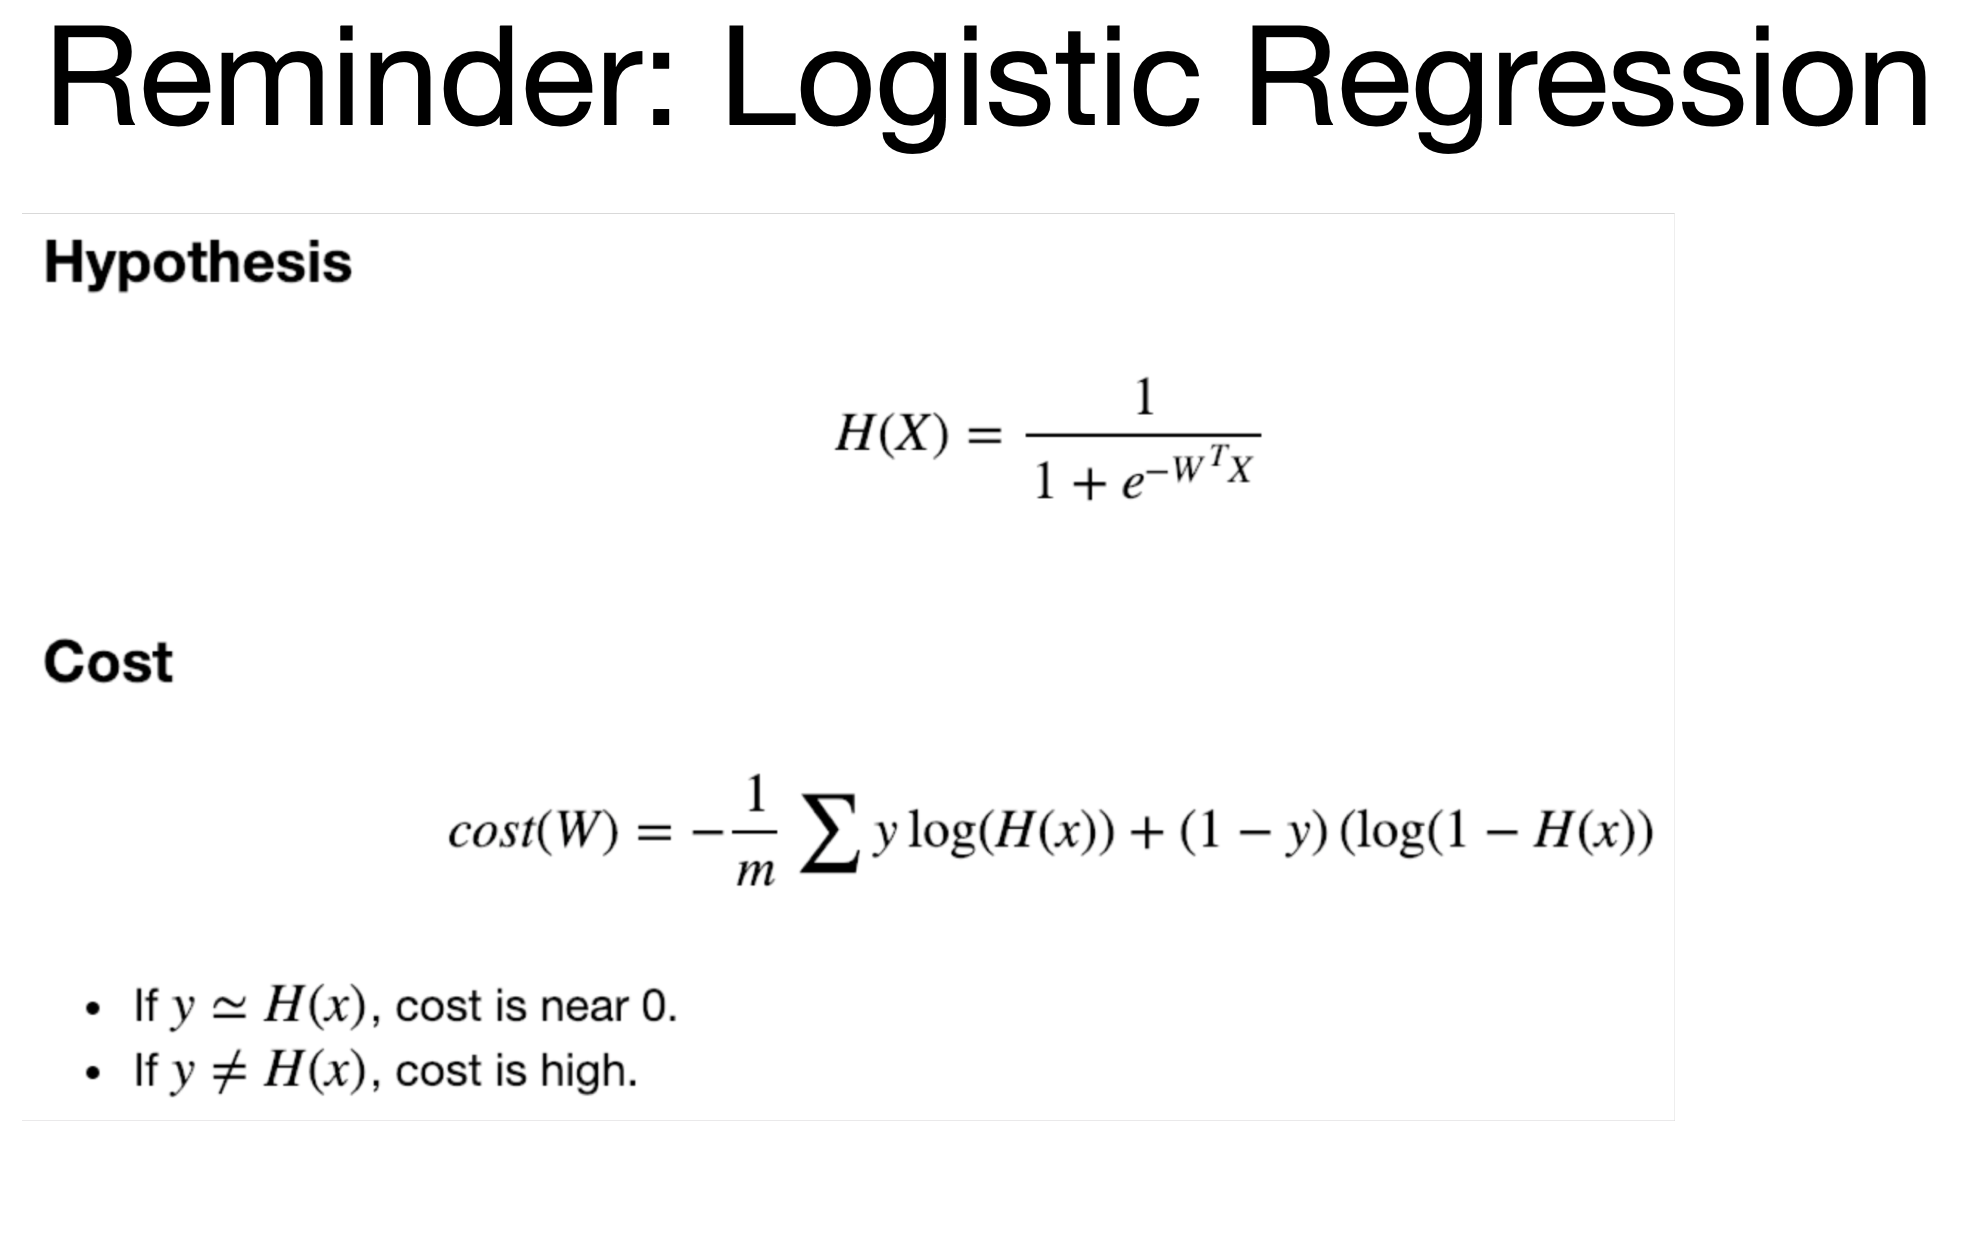

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [2]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]] # 6 X 2
y_data = [[0],[0],[0],[1],[1],[1]] # 6 X 1


In [3]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [4]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [5]:
# exp값 잘나오는지 확인하기.
# 무조건 Tensor type만 들어가진다.
torch.exp(torch.FloatTensor([1]))

# we can use it to compute the hypothesis fucntion conveniently
w = torch.zeros((2,1), requires_grad = True) # 2 x 1
b = torch.zeros(1, requires_grad = True) # 원래는 6인데, broadcating이 가능함.

In [6]:
# hypothesis (이건 직접 구현한거)
# H(X*W + b)를 집어넣으면 됌.
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(w)+b)))
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


In [7]:
# torch에서 만들어준거
hypothesis = torch.sigmoid(x_train.matmul(w)+b)
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
torch.Size([6, 1])


# Cost
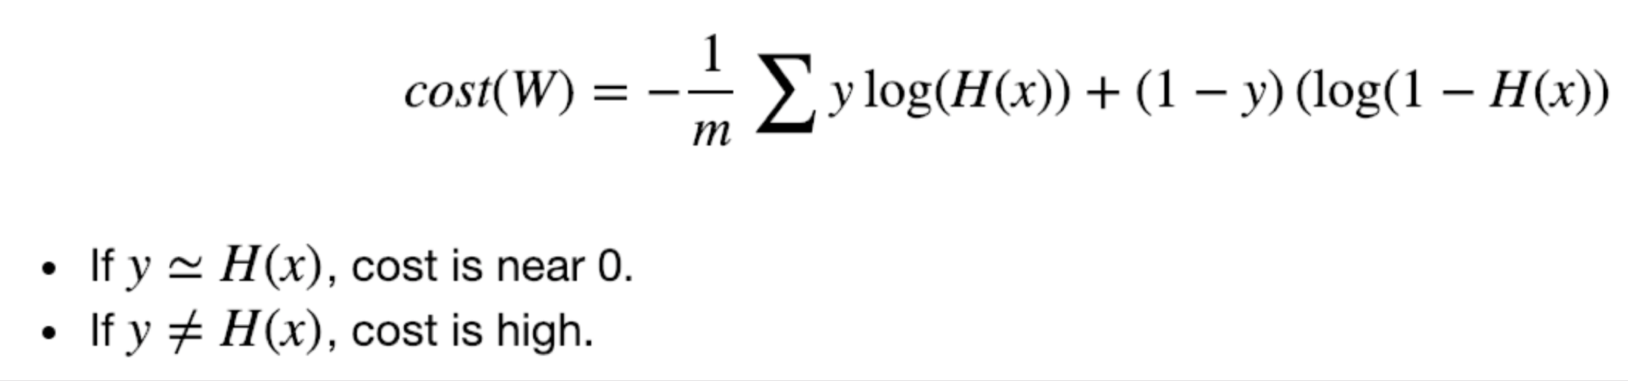

In [8]:
# cost function
# element 1개
-(y_train[0]*torch.log(hypothesis[0]) + (1 - y_train[0])*torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward>)

In [9]:
# element 전체
losses =  -(y_train*torch.log(hypothesis) + (1 - y_train)*torch.log(1 - hypothesis))
print(losses)
print(losses.mean())

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)
tensor(0.6931, grad_fn=<MeanBackward0>)


In [10]:
# pytorch 구현
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

# 전체적인 Training Procedure

In [11]:
# 모델 초기화
w = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# optim
optimizer = optim.SGD([w,b], lr = 1)


In [12]:
# training
n_epochs = 1000
for epoch in range(n_epochs+1):
    Hypothesis = torch.sigmoid(x_train.matmul(w) + b)
    cost = F.binary_cross_entropy(Hypothesis, y_train)
    
    #optim
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:6f}'.format(epoch, n_epochs, cost.item()))
    

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


# Evaluation
- After we finish training the model, we want to check how well fits the training set.

In [13]:
prediction = Hypothesis > torch.FloatTensor([0.5])
print(prediction)
print(y_train)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [14]:
correct_prediction = prediction.float() == y_train
print(correct_prediction)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True]])


# Higher Implementation with Class


In [15]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))
model = BinaryClassifier()

In [16]:
# 학습하기
optimizer = optim.SGD(model.parameters(), lr = 1)
n_epochs = 100
for epoch in range(n_epochs + 1):
    hypothesis = model(x_train) # P(x=1)계산
    cost = F.binary_cross_entropy(hypothesis, y_train) # loss 계산
    
    optimizer.zero_grad() # zero_grad 계산
    cost.backward() # backward계산
    optimizer.step() # 전송
    
    # 성능평가하기.
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) #threshold 잡아놓기
        correct_prediction = prediction.float() == y_train #accuracy 잡아놓기
        accuracy = correct_prediction.sum().item() / len(correct_prediction) 
        # 출력하기.
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, n_epochs, cost.item(), accuracy * 100,
        ))        
        

Epoch    0/100 Cost: 0.539713 Accuracy 83.33%
Epoch   10/100 Cost: 0.614853 Accuracy 66.67%
Epoch   20/100 Cost: 0.441875 Accuracy 66.67%
Epoch   30/100 Cost: 0.373145 Accuracy 83.33%
Epoch   40/100 Cost: 0.316358 Accuracy 83.33%
Epoch   50/100 Cost: 0.266094 Accuracy 83.33%
Epoch   60/100 Cost: 0.220498 Accuracy 100.00%
Epoch   70/100 Cost: 0.182095 Accuracy 100.00%
Epoch   80/100 Cost: 0.157299 Accuracy 100.00%
Epoch   90/100 Cost: 0.144091 Accuracy 100.00%
Epoch  100/100 Cost: 0.134272 Accuracy 100.00%


# nn.squential 사용하기

In [21]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(2,1),
            nn.Sigmoid(),
        )
        
    def forward(self,x):
        return self.fc(x)
    
model = MyModel()
model

MyModel(
  (fc): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
)

In [22]:
# 학습하기
optimizer = optim.SGD(model.parameters(), lr = 1)
n_epochs = 100
for epoch in range(n_epochs + 1):
    hypothesis = model(x_train) # P(x=1)계산
    cost = F.binary_cross_entropy(hypothesis, y_train) # loss 계산
    
    optimizer.zero_grad() # zero_grad 계산
    cost.backward() # backward계산
    optimizer.step() # 전송
    
    # 성능평가하기.
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy =  correct_prediction.sum().item() / len(correct_prediction)
        # 출력하기.
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, n_epochs, cost.item(), accuracy * 100,
        ))        
        

Epoch    0/100 Cost: 0.725765 Accuracy 33.33%
Epoch   10/100 Cost: 0.452269 Accuracy 83.33%
Epoch   20/100 Cost: 0.603033 Accuracy 83.33%
Epoch   30/100 Cost: 0.485839 Accuracy 83.33%
Epoch   40/100 Cost: 0.399292 Accuracy 83.33%
Epoch   50/100 Cost: 0.317865 Accuracy 83.33%
Epoch   60/100 Cost: 0.244316 Accuracy 83.33%
Epoch   70/100 Cost: 0.188225 Accuracy 100.00%
Epoch   80/100 Cost: 0.158080 Accuracy 100.00%
Epoch   90/100 Cost: 0.144390 Accuracy 100.00%
Epoch  100/100 Cost: 0.134524 Accuracy 100.00%
